# This example shows how to perform a selfconsistent calculation with local interactions for a honeycomb zigzag ribbon
### Import the necessary libraries

In [1]:
# Add the root path of the pyqula library
import os ; import sys
sys.path.append(os.getcwd()+"/../../src")


# import numpy and pyqula
import numpy as np
import matplotlib.pyplot as plt
from pyqula import geometry

### Create the geometry of the honeycomb lattice model, and its first neighbor Hamiltonian
$$ H = \sum_{\langle ij \rangle} c^\dagger_i c_j $$
where $\langle ij \rangle $ denotes first neighbors in the honeycomb lattice

In [2]:
g = geometry.honeycomb_zigzag_ribbon(10) # create the geometry
h = g.get_hamiltonian() # create hamiltonian of the system

### Perform a selfconsistent calculation including repulsive local Hubbard interactions
$$ H_U = U\sum_i c^\dagger_{i,\uparrow} c_{i,\uparrow} c^\dagger_{i,\downarrow} c_{i,\downarrow} \approx 
U\sum_i \langle c^\dagger_{i,\uparrow} c_{i,\uparrow} \rangle c^\dagger_{i,\downarrow} c_{i,\downarrow} +
U\sum_i c^\dagger_{i,\uparrow} c_{i,\uparrow} \langle c^\dagger_{i,\downarrow} c_{i,\downarrow} \rangle $$

In [3]:
hscf = h.get_mean_field_hamiltonian(U=1.0,filling=0.5,mf="antiferro") # perform SCF calculation

### Diagonalize the non-interacting and interacting Bloch Hamiltonian
The following function will obtain the Bloch eigenvalues $\epsilon_k$ defined as
$$ H \left | \Psi_k \right \rangle = \epsilon_k \left | \Psi_k \right \rangle $$

In [4]:
(k,e) = h.get_bands() # get the bandstructure
(kscf,escf) = hscf.get_bands() # get the bandstructure

### Plot the Bloch band structure in the path

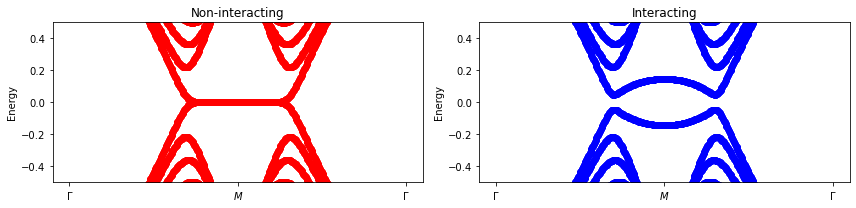

In [5]:
fig = plt.figure(figsize=(12, 3)) # set the right ratio
plt.subplot(121)
plt.title("Non-interacting")
plt.scatter(k/max(k),e,c="red") # do a scatter plot
plt.ylabel("Energy") # set the y label 
plt.xticks([0.,0.5,1.],["$\Gamma$","$M$","$\Gamma$"])
plt.ylim([-0.5,0.5])


plt.subplot(122)
plt.title("Interacting")
plt.scatter(kscf/max(kscf),escf,c="blue") # do a scatter plot
plt.ylabel("Energy") # set the y label 
plt.xticks([0.,0.5,1.],["$\Gamma$","$M$","$\Gamma$"])
plt.ylim([-0.5,0.5])

plt.tight_layout()
plt.show()

